# Análisis exploratrio 

## Importación de librerías 

In [9]:
import pandas as pd
from matplotlib import  pyplot as plt 
from math import factorial
from scipy import stats as st
import math as math
import numpy as np
import seaborn as sns

## Cargar de archivos

In [10]:
df_viajes = pd.read_csv('./datasets/moved_project_sql_result_01.csv')
df_finalizacion_de_viajes = pd.read_csv('./datasets/moved_project_sql_result_04.csv')
df_viajes_loop_a_ohare = pd.read_csv('./datasets/moved_project_sql_result_07.csv')

### Análisis de datos

In [11]:
print(df_viajes.info())
print()
print(df_viajes.head())
print()
print(df_finalizacion_de_viajes.info())
print()
df_finalizacion_de_viajes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
print(df_viajes.duplicated().sum())
print()
df_finalizacion_de_viajes.duplicated().sum()


0



0

### Identificar los 10 principales barrios en términos de finalización del recorrido

In [13]:
principales_barrios = df_finalizacion_de_viajes.head(10)

In [14]:
principales_barrios

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

<function matplotlib.pyplot.show(close=None, block=None)>

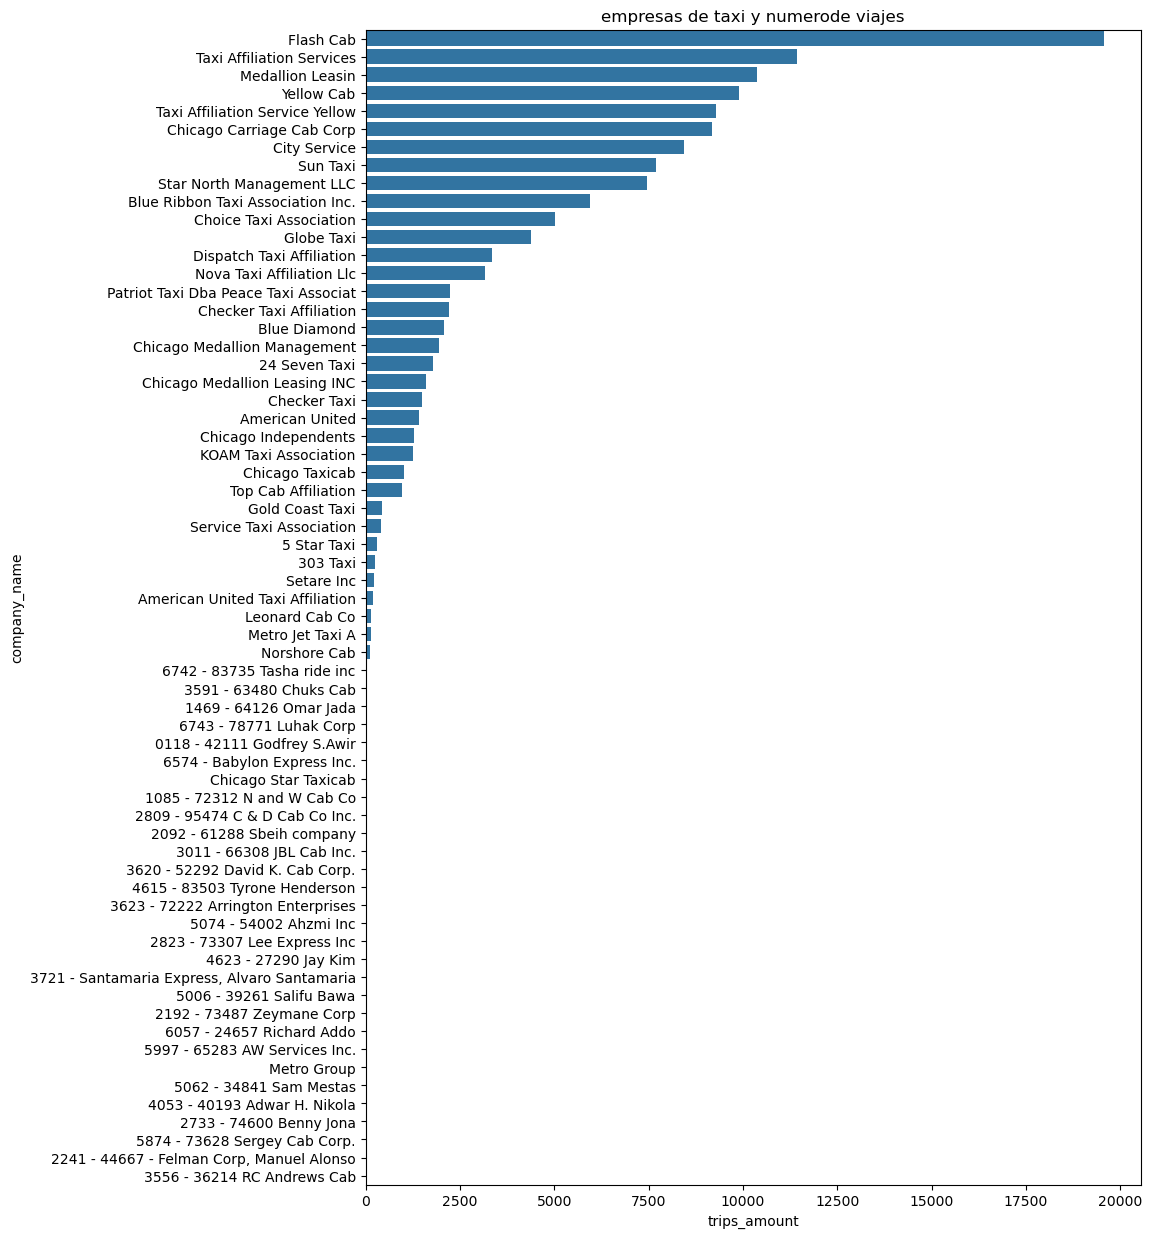

In [15]:
plt.subplots(figsize=(10, 15))
sns.barplot(x='trips_amount', y= 'company_name', data= df_viajes )
plt.title('empresas de taxi y numerode viajes')
plt.xlabel('trips_amount') 
plt.ylabel('company_name')
plt.show
  

<function matplotlib.pyplot.show(close=None, block=None)>

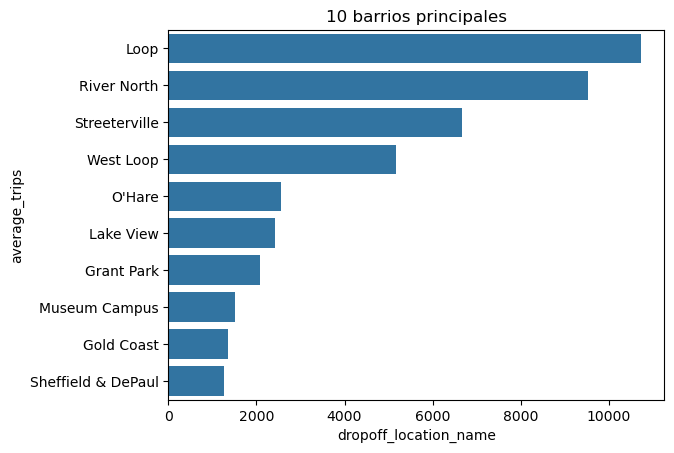

In [16]:
sns.barplot(x='average_trips', y= 'dropoff_location_name', data= principales_barrios)
plt.title('10 barrios principales')
plt.xlabel('dropoff_location_name') 
plt.ylabel('average_trips')
plt.show


### Sacar conclusiones basadas en cada gráfico y explicar los resultados

<div class="alert alert-block alert-info"> 

<b>Respuesta</b> <a class="tocSkip"></a> 

  El gráfico de las compañías nos informa que tenemos una empresa favorita entre los usuarisos que es Flas Cab, que cuenta con casi 20000 viajes.
    por otro lado el barrio qe hace uso con mayor frecuecia de los viajes es Loop con un proedio de 10727.466667.

</div> 

## Prueba de hipótesis

### "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [17]:
df_viajes_loop_a_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
variable_1 = df_viajes_loop_a_ohare.query('weather_conditions == "Bad"')['duration_seconds']
print(variable_1) 
variable_2 =df_viajes_loop_a_ohare.query('weather_conditions == "Good"')['duration_seconds']
print(variable_2) 

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64
0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64


In [19]:
alpha = 0.05 

results = st.ttest_ind( 
    variable_1,  
    variable_2, equal_var=False) 
print('valor p: ', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula") 
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  6.738994326108734e-12
Rechazamos la hipótesis nula


<div class="alert alert-block alert-info"> 

<b>Respuesta </b> <a class="tocSkip"></a> 
    
 En la prueva de hipótesis podemos obtener que el promedio de duración no es significativo, solo que tenemos una gran diferencia en la cantidad de datos por muetra ya que de dias de lluvia son 180 y dias de sol son 888. esto interfiere en el promedio y nos difiere en el resultado de la hipótesis.
  

</div> 